## Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
anger_train=pd.read_csv("anger.csv")
fear_train=pd.read_csv("fear.csv")
joy_train=pd.read_csv("joy.csv")
sadness_train=pd.read_csv("sadness.csv")

In [3]:
dataset=pd.concat((anger_train, fear_train, joy_train, sadness_train))
dataset.reset_index(level=None, drop=True, inplace=True)
dataset

,id,tweet,emotion,score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3642,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3643,40782,Just put the winter duvet on â˜ƒï¸â„ï¸ðŸŒ¬â...,sadness,0.104
3644,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3645,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [4]:
remove_punctuation = dict((ord(char), None) for char in string.punctuation)
remove_numbers = dict((ord(str(num)), None) for num in np.arange(0,10))

In [5]:
def clean_text(data):
        rem1=r'#[A-Za-z0-9_]+'
        rem2=r'@[A-Za-z0-9_]+'
        rem3=r'https?://[A-Za-z0-9./]+'
        pair=r'|'.join((rem1,rem2,rem3))
        tweet_=re.sub(pair,'', data)
        letters_only=re.sub('[^a-zA-Z]', ' ',tweet_)
        lower_case=letters_only.lower()
        string_=(lower_case.translate(remove_punctuation)).translate(remove_numbers)
        stoplist = stopwords.words('english')
        clean=[x for x in nltk.word_tokenize(string_) if x not in stoplist]
        cleaned= ' '.join(clean)
        
        return cleaned

In [6]:
for i in range(0, dataset.shape[0]):
    dataset['tweet'][i]=clean_text(dataset['tweet'][i])
dataset

,id,tweet,emotion,score
0,10000,fu k heck moved fridge knock landlord door,anger,0.938
1,10001,indian uber driver called someone n word movin...,anger,0.896
2,10002,asked parcel delivered pick store address,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,join put phone talk rude taking money acc will...,anger,0.896
...,...,...,...,...
3642,40781,thank much home stunned happy think sunk yet wow,sadness,0.104
3643,40782,put winter duvet,sadness,0.104
3644,40783,pretty love sky background purple highlights d...,sadness,0.088
3645,40784,second artist announcement looking good,sadness,0.083


### TextBlob for Text Sentiment based on Polarity

In [41]:
df1=dataset.iloc[:,[1,2,3]]

In [42]:
polarity=[]
subjectivity=[]
for tweet in df1['tweet']:
    analysis = TextBlob(tweet)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
df1[['polarity','subjectivity']]=pd.DataFrame(polarity).merge(pd.DataFrame(subjectivity), 
                                                                   right_index=True, left_index=True, how='inner')

In [43]:
df1

,tweet,emotion,score,polarity,subjectivity
0,fu k heck moved fridge knock landlord door,anger,0.938,0.000000,0.000000
1,indian uber driver called someone n word movin...,anger,0.896,0.000000,0.000000
2,asked parcel delivered pick store address,anger,0.896,0.000000,0.000000
3,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,0.400000,0.400000
4,join put phone talk rude taking money acc will...,anger,0.896,-0.300000,0.600000
...,...,...,...,...,...
3642,thank much home stunned happy think sunk yet wow,sadness,0.104,0.366667,0.733333
3643,put winter duvet,sadness,0.104,0.000000,0.000000
3644,pretty love sky background purple highlights d...,sadness,0.088,0.314583,0.712500
3645,second artist announcement looking good,sadness,0.083,0.350000,0.300000


In [44]:
sentiment=[]
for p in df1['polarity']:
    if p>0:
        sentiment.append('positive')
    elif p==0:
        sentiment.append('neutral')
    else:
        sentiment.append('negative')
df1['sentiment']=pd.DataFrame(sentiment)
df1

,tweet,emotion,score,polarity,subjectivity,sentiment
0,fu k heck moved fridge knock landlord door,anger,0.938,0.000000,0.000000,neutral
1,indian uber driver called someone n word movin...,anger,0.896,0.000000,0.000000,neutral
2,asked parcel delivered pick store address,anger,0.896,0.000000,0.000000,neutral
3,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,0.400000,0.400000,positive
4,join put phone talk rude taking money acc will...,anger,0.896,-0.300000,0.600000,negative
...,...,...,...,...,...,...
3642,thank much home stunned happy think sunk yet wow,sadness,0.104,0.366667,0.733333,positive
3643,put winter duvet,sadness,0.104,0.000000,0.000000,neutral
3644,pretty love sky background purple highlights d...,sadness,0.088,0.314583,0.712500,positive
3645,second artist announcement looking good,sadness,0.083,0.350000,0.300000,positive


In [45]:
cross=pd.crosstab(df1.emotion, df1.sentiment).apply(lambda x: x/sum(x)*100, axis=1)
cross

sentiment,negative,neutral,positive
emotion,,,
anger,29.629630,39.618406,30.751964
fear,29.991282,38.709677,31.299041
joy,13.851762,30.255164,55.893074
sadness,33.206107,34.987277,31.806616


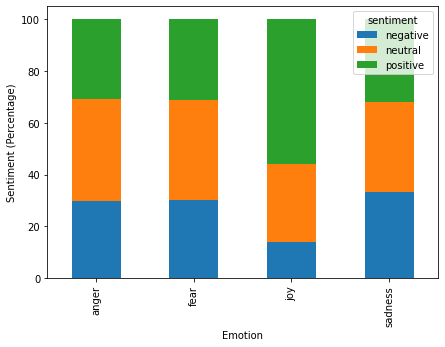

In [46]:
cross.plot(kind='bar', stacked=True, figsize=(7,5))
plt.xlabel('Emotion')
plt.ylabel('Sentiment (Percentage)');

### VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [ ]:
#nltk.download('vader_lexicon')

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

In [53]:
df2=dataset.iloc[:,[1,2,3]]

In [56]:
for i in range(0, df2.shape[0]):
    df2['Negative_intensity'][i]=sentiment.polarity_scores(df2['tweet'][i])['neg']
    df2['Neutral_intensity'][i]=sentiment.polarity_scores(df2['tweet'][i])['neu']
    df2['Positive_intensity'][i]=sentiment.polarity_scores(df2['tweet'][i])['pos']
    df2['Compound_intensity'][i]=sentiment.polarity_scores(df2['tweet'][i])['compound']
df2

,tweet,emotion,score,Negative_intensity,Neutral_intensity,Positive_intensity,Compound_intensity
0,fu k heck moved fridge knock landlord door,anger,0.938,0.439,0.561,0.000,-0.6908
1,indian uber driver called someone n word movin...,anger,0.896,0.000,1.000,0.000,0.0000
2,asked parcel delivered pick store address,anger,0.896,0.000,1.000,0.000,0.0000
3,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,0.348,0.652,0.000,-0.5859
4,join put phone talk rude taking money acc will...,anger,0.896,0.246,0.574,0.180,-0.2023
...,...,...,...,...,...,...,...
3642,thank much home stunned happy think sunk yet wow,sadness,0.104,0.085,0.305,0.610,0.8625
3643,put winter duvet,sadness,0.104,0.000,1.000,0.000,0.0000
3644,pretty love sky background purple highlights d...,sadness,0.088,0.141,0.260,0.599,0.8689
3645,second artist announcement looking good,sadness,0.083,0.000,0.580,0.420,0.4404


### SentiWordNet(SWN)

In [64]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag

In [ ]:
# nltk.download('sentiwordnet')

In [72]:
def tag(text):
    token=word_tokenize(text)
    return pos_tag(token)

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def get_sentiment(word,tag):
    
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []
    
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

**Checking Sentiment on some tweets**

In [102]:
dataset['tweet'][99]

'another angry white man'

In [97]:
pos=tag(dataset['tweet'][99])

In [100]:
senti = [get_sentiment(x,y) for (x,y) in pos]

In [101]:
print("text is", pos)
print(" ")
print("sentiment score [pos,neg,obj] is-",senti)

text is [('another', 'DT'), ('angry', 'JJ'), ('white', 'JJ'), ('man', 'NN')]
 
sentiment score [pos,neg,obj] is- [[], [0.375, 0.375, 0.25], [0.0, 0.25, 0.75], [0.0, 0.0, 1.0]]


In [113]:
print("text is", tag(dataset['tweet'][1000]))
print(" ")
print("sentiment score [pos,neg,obj] is-",[get_sentiment(x,y) for (x,y) in tag(dataset['tweet'][1000])])

text is [('isis', 'NN'), ('references', 'NNS'), ('scrubbed', 'VBD'), ('federal', 'JJ'), ('complaint', 'NN'), ('suspect', 'NN'), ('nyc', 'JJ'), ('nj', 'JJ'), ('bombings', 'NNS'), ('appears', 'VBZ'), ('omit', 'JJ'), ('terror', 'NN'), ('names', 'NNS'), ('bloody', 'VBP'), ('journ', 'NN')]
 
sentiment score [pos,neg,obj] is- [[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.375, 0.625], [0.0, 0.0, 1.0], [0.25, 0.5, 0.25], [0.25, 0.0, 0.75], [], [], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [], [0.25, 0.75, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], []]
